In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [68]:
g = pd.read_json('../structures/ancestral-variants.json', orient='records')

In [69]:
g

,pdb1,pdb2,chain1,chain2,tm1,tm2,rmsd,id1,id2,idali,l1,l2,lali,variant,stochiometry,lineage
0,nsdb-001546,nsdb-000386,:D:A:E:B,:D:A:E:B,0.9989,0.9989,0.46,0.973,0.973,0.973,2002,2002,2002,ALTALL,DDKK,Anc_1392
1,nsdb-002579,nsdb-000386,:D:A:E:B,:D:A:E:B,0.9989,0.9989,0.46,0.989,0.989,0.989,2002,2002,2002,ALT4,DDKK,Anc_1392
2,nsdb-002940,nsdb-000386,:A:D:E:B,:A:D:E:B,0.9994,0.9994,0.33,0.990,0.990,0.990,2002,2002,2002,ALT5,DDKK,Anc_1392
3,nsdb-003122,nsdb-000386,:A:D:E:B,:D:A:B:E,0.9996,0.9996,0.29,0.988,0.988,0.988,2002,2002,2002,ALT3,DDKK,Anc_1392
4,nsdb-003234,nsdb-000386,:D:A:E:B,:A:D:B:E,0.9991,0.9991,0.44,0.991,0.991,0.991,2002,2002,2002,ALT2,DDKK,Anc_1392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,nsdb-003792,nsdb-001538,:A:B,:A:B,0.9973,0.9973,0.43,0.967,0.967,0.967,544,544,544,ALTALL,HH,Anc_1467
3826,nsdb-005125,nsdb-001538,:B:A,:A:B,0.9969,0.9969,0.46,0.982,0.982,0.982,544,544,544,ALT3,HH,Anc_1467
3827,nsdb-005140,nsdb-001538,:B:A,:A:B,0.9975,0.9975,0.41,0.978,0.978,0.978,544,544,544,ALT4,HH,Anc_1467
3828,nsdb-005222,nsdb-001538,:B:A,:A:B,0.9967,0.9967,0.47,0.989,0.989,0.989,544,544,544,ALT5,HH,Anc_1467


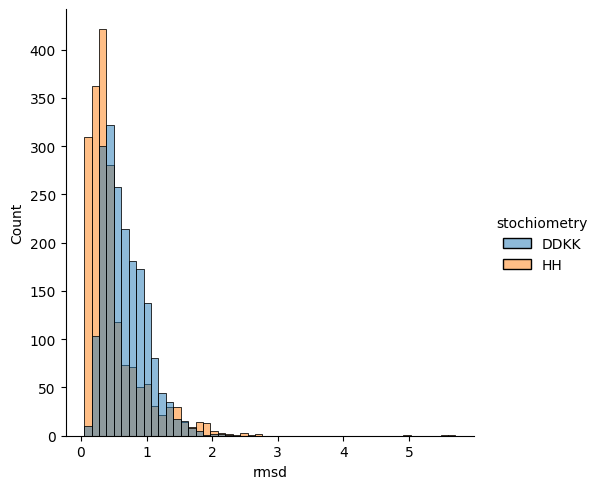

In [70]:
sns.displot(x='rmsd', hue='stochiometry', data=g, bins=50)

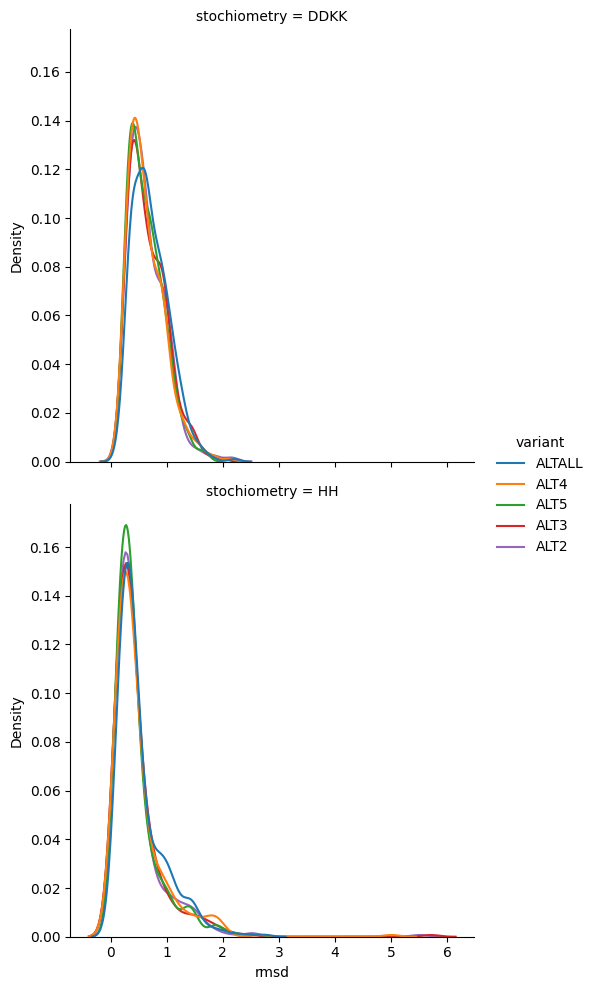

In [71]:
sns.displot(x='rmsd', row='stochiometry', data=g, hue='variant', kind='kde')

In [72]:
g_mean = g[['lineage', 'stochiometry', 'rmsd', 'tm2']].groupby(['lineage', 'stochiometry'], as_index=False).mean()

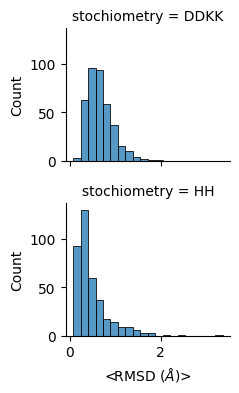

In [79]:
g = sns.displot(x='rmsd', row='stochiometry', data=g_mean, bins=20, height=2, aspect=1.25)
g.set_xlabels('<RMSD ($\AA$)>')
g.savefig('../figures/ddkk-hh-histogram-ancvar-rmsd.svg')
g.savefig('../figures/ddkk-hh-histogram-ancvar-rmsd.png', dpi=300)

In [74]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x + '_map'
    except:
        return x

distances_from_root = pd.read_csv('../data/tree/AGNifAlign103.asr.dist821.csv').rename(columns={'node': 'id'})
distances_from_root['id'] = distances_from_root['id'].apply(place_anc_tag)
distances_from_root['ancestral'] = distances_from_root['id'].apply(lambda x: x[:3] == 'Anc')
distances_from_root = distances_from_root.query('ancestral == True').copy()
distances_from_root['id'] = distances_from_root['id'].apply(lambda x: x.replace('_map', ''))
distances_from_root

,id,dist_from_821,ancestral
0,Anc_771,1.829611,True
1,Anc_772,1.795645,True
2,Anc_781,1.776833,True
3,Anc_783,1.756560,True
4,Anc_784,1.709936,True
...,...,...,...
763,Anc_778,1.914698,True
764,Anc_780,1.959595,True
765,Anc_779,1.949699,True
766,Anc_775,1.889152,True


In [75]:
g_mean = pd.merge(g_mean, distances_from_root, left_on='lineage', right_on='id', how='inner')

In [76]:
g_mean

,lineage,stochiometry,rmsd,tm2,id,dist_from_821,ancestral
0,Anc_1206,DDKK,0.670,0.997560,Anc_1206,0.212418,True
1,Anc_1206,HH,0.220,0.999260,Anc_1206,0.212418,True
2,Anc_1207,DDKK,0.418,0.999080,Anc_1207,0.684696,True
3,Anc_1207,HH,0.552,0.989280,Anc_1207,0.684696,True
4,Anc_1208,DDKK,0.410,0.999100,Anc_1208,1.049746,True
...,...,...,...,...,...,...,...
763,Anc_819,HH,3.362,0.832360,Anc_819,1.143298,True
764,Anc_820,DDKK,0.860,0.996475,Anc_820,0.226952,True
765,Anc_820,HH,0.500,0.996600,Anc_820,0.226952,True
766,Anc_821,DDKK,0.954,0.995680,Anc_821,0.000000,True


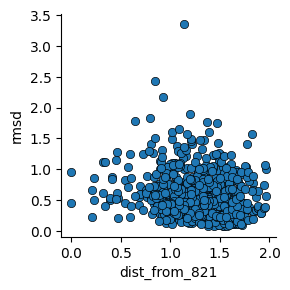

In [77]:
sns.relplot(x='dist_from_821', y='rmsd', data=g_mean, height=3, marker='o', edgecolor='black')

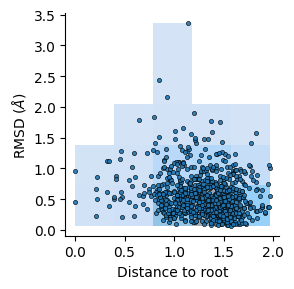

In [78]:
g = sns.displot(x='dist_from_821', y='rmsd', data=g_mean, height=3, bins=5, alpha=0.5)
g.map(sns.scatterplot, 'dist_from_821', 'rmsd', marker='.', edgecolor='black', alpha=0.9)
g.set_xlabels('Distance to root')
g.set_ylabels('RMSD ($\AA$)')
g.savefig('../figures/scatter-ancestralvar-distroot-rmsd.svg')
g.savefig('../figures/scatter-ancestralvar-distroot-rmsd.png', dpi=300)